# Importing libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import quandl
quandl.ApiConfig.api_key = "ybsysG4Eemy9AWq9_Kfc"

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [4]:
h0 = pd.read_stata("H0_cpy_all.dta")

In [5]:
comnames = pd.read_excel("UN Comtrade Commodity Classifications.xlsx") # from http://unstats.un.org/unsd/tradekb/Attachment439.aspx?AttachmentType=1
comnames = comnames[(comnames.Classification == 'H5')]

In [6]:
ucom_codes = pd.read_csv('UCOM-datasets-codes.csv') # https://www.quandl.com/data/UCOM-United-Nations-Commodity-Trade/usage/export

# Identifying the most effective export products of a country with high opportunity value

In [7]:
comtoexp = h0[(h0.year == 2016)].drop(columns=['year', 'population']).copy()

In [8]:
comtoexp[
    (comtoexp.exporter == 'IDN')
    & (comtoexp.oppgain != 0)].sort_values(by='rca', ascending=False).head(30).sort_values(by='oppgain', ascending=False)

,exporter,commoditycode,inatlas,export_value,rca,rpop,mcp,eci,pci,oppval,oppgain,distance,import_value
6015696,IDN,3906,1,1.203777e+08,0.874630,0.281450,0,-0.306436,3.549678,2.017173,1.375214,0.858848,1.685783e+08
6016107,IDN,7320,1,6.158685e+07,0.965894,0.310818,0,-0.306436,2.760722,2.017173,1.110544,0.833846,6.319412e+07
6015690,IDN,3823,1,4.206575e+08,0.917116,0.295121,0,-0.306436,2.269975,2.017173,1.029126,0.837574,3.757021e+08
6016307,IDN,8507,1,3.511796e+08,0.863309,0.277807,0,-0.306436,2.098567,2.017173,0.913961,0.794814,2.750838e+08
6016387,IDN,9001,1,2.363316e+08,0.946537,0.304589,0,-0.306436,2.205543,2.017173,0.874201,0.810426,9.607457e+07
6016091,IDN,7304,1,1.795441e+08,0.847914,0.272853,0,-0.306436,1.851715,2.017173,0.866979,0.831914,2.874269e+08
6016004,IDN,6813,1,1.536922e+07,0.989428,0.318391,0,-0.306436,1.254636,2.017173,0.854599,0.829606,3.388543e+07
6016207,IDN,8303,1,1.066536e+07,0.850828,0.273790,0,-0.306436,2.132031,2.017173,0.804965,0.810935,1.078461e+07
6015675,IDN,3808,1,2.776491e+08,0.851393,0.273972,0,-0.306436,1.794060,2.017173,0.794174,0.833848,4.170464e+08
6016233,IDN,8418,1,4.095482e+08,0.949633,0.305585,0,-0.306436,1.915654,2.017173,0.756746,0.803733,3.241991e+08


In [9]:
comnames[comnames.Code == str(3906)] # Identifying the product with the highest opportunity value

,Classification,Code,Description,Code Parent,Level,isLeaf
34828,H5,3906,Acrylic polymers in primary forms,39,4,0


In [10]:
comnames[comnames.Code == str(39)] # Identifying the product group into which it belongs

,Classification,Code,Description,Code Parent,Level,isLeaf
34792,H5,39,Plastics and articles thereof,TOTAL,2,0


# Acquiring trading data for that product type

In [18]:
plas_dat = pd.read_csv('plas_dat') # I complied this data from the UN Comtrade API.
plas_dat.drop(columns='Date', inplace=True)
# Because it takes a while to download it, I wrote out the table into a file.
# Below you can find the steps I made.

# Rendering the plot

In [12]:
imp_cols = (plas_dat.columns.str[-20:] == 'Import - Trade (USD)') & (plas_dat.columns.str[-23:] != 'Re-Import - Trade (USD)')

In [13]:
imp_dat = plas_dat.loc[:,imp_cols].dropna(how='all')

In [14]:
imp_dat.head()

,Acrylic polymers nes; in primary forms - Import - Trade (USD),Acrylonitrile-butadiene-styrene (ABS) copolymers - Import - Trade (USD),Alginic acid; its salts & esters; in primary forms - Import - Trade (USD),Alkyd resins; in primary forms - Import - Trade (USD),Amino-resins nes; in primary forms - Import - Trade (USD),Bathroom wares nes; of plastics - Import - Trade (USD),Baths; shower-baths and wash basins; of plastics - Import - Trade (USD),Boxes; cases; crates etc. of plastic - Import - Trade (USD),Carboxymethylcellulose; salts; in primary forms - Import - Trade (USD),Cellulose acetates; non-plasticised; in primary forms - Import - Trade (USD),...,Silicones in primary forms - Import - Trade (USD),Styrene-acrylonitrile (SAN) copolymers; primary forms - Import - Trade (USD),Tube; pipe or hose; rigid; of polyethylene - Import - Trade (USD),Tube; pipe or hose; rigid; of polypropylene - Import - Trade (USD),Tube; pipe or hose; rigid; of polyvinyl chloride - Import - Trade (USD),Urea resins; thiourea resins; in primary forms - Import - Trade (USD),Vinyl chloride copolymers nes in primary forms - Import - Trade (USD),Vinyl chloride-vinyl acetate copolymers; primary form - Import - Trade (USD),Vinyl polymers; halogenated olefins; primary form; ne - Import - Trade (USD),Vinylidene chloride polymers in primary forms - Import - Trade (USD)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75874557.0,9929185.0,3087589.0,11234050.0,15904042.0,8997130.0,6433072.0,7858921.0,6851113.0,20686770.0,...,8635769.0,583064.0,15425077.0,6057782.0,6265034.0,8793888.0,431285.0,653549.0,3825344.0,37692.0
2,1482.0,NaN,NaN,245011.0,NaN,36382.0,108210.0,122637.0,NaN,271.0,...,6613.0,NaN,112768.0,32904.0,64723.0,183.0,283.0,NaN,NaN,NaN
3,111884626.0,14139630.0,2131778.0,302686.0,22266725.0,827146.0,4219622.0,17781391.0,8338867.0,45667.0,...,26772557.0,3856809.0,3990155.0,1337204.0,2570083.0,661240.0,931732.0,877328.0,17135550.0,4024234.0
4,8046155.0,NaN,NaN,539473.0,583635.0,2524783.0,627635.0,2854302.0,57589.0,NaN,...,625628.0,NaN,5679696.0,921824.0,625835.0,96778.0,NaN,NaN,42138.0,NaN


In [15]:
impcors = imp_dat.corr().dropna(axis=(0,1), how='all')

In [16]:
impcors.head()

,Acrylic polymers nes; in primary forms - Import - Trade (USD),Acrylonitrile-butadiene-styrene (ABS) copolymers - Import - Trade (USD),Alginic acid; its salts & esters; in primary forms - Import - Trade (USD),Alkyd resins; in primary forms - Import - Trade (USD),Amino-resins nes; in primary forms - Import - Trade (USD),Bathroom wares nes; of plastics - Import - Trade (USD),Baths; shower-baths and wash basins; of plastics - Import - Trade (USD),Boxes; cases; crates etc. of plastic - Import - Trade (USD),Carboxymethylcellulose; salts; in primary forms - Import - Trade (USD),Cellulose acetates; non-plasticised; in primary forms - Import - Trade (USD),...,Silicones in primary forms - Import - Trade (USD),Styrene-acrylonitrile (SAN) copolymers; primary forms - Import - Trade (USD),Tube; pipe or hose; rigid; of polyethylene - Import - Trade (USD),Tube; pipe or hose; rigid; of polypropylene - Import - Trade (USD),Tube; pipe or hose; rigid; of polyvinyl chloride - Import - Trade (USD),Urea resins; thiourea resins; in primary forms - Import - Trade (USD),Vinyl chloride copolymers nes in primary forms - Import - Trade (USD),Vinyl chloride-vinyl acetate copolymers; primary form - Import - Trade (USD),Vinyl polymers; halogenated olefins; primary form; ne - Import - Trade (USD),Vinylidene chloride polymers in primary forms - Import - Trade (USD)
Acrylic polymers nes; in primary forms - Import - Trade (USD),1.000000,0.789738,0.541951,0.718373,0.851314,0.593716,0.595651,0.717739,0.692476,0.761827,...,0.857520,0.811517,0.667762,0.740437,0.601967,0.581336,0.585053,0.887942,0.869964,0.784358
Acrylonitrile-butadiene-styrene (ABS) copolymers - Import - Trade (USD),0.789738,1.000000,0.158482,0.285486,0.520684,0.110023,0.126114,0.377396,0.338994,0.744372,...,0.691611,0.987964,0.208998,0.461456,0.280037,0.242516,0.339166,0.846265,0.658327,0.607757
Alginic acid; its salts & esters; in primary forms - Import - Trade (USD),0.541951,0.158482,1.000000,0.541670,0.573391,0.573115,0.661983,0.655763,0.669466,0.429803,...,0.574107,0.153170,0.549777,0.597823,0.369796,0.487601,0.363314,0.411448,0.530138,0.460871
Alkyd resins; in primary forms - Import - Trade (USD),0.718373,0.285486,0.541670,1.000000,0.736844,0.862477,0.821347,0.714181,0.669299,0.257252,...,0.578783,0.289318,0.911773,0.688295,0.763112,0.706392,0.544609,0.497386,0.632264,0.594680
Amino-resins nes; in primary forms - Import - Trade (USD),0.851314,0.520684,0.573391,0.736844,1.000000,0.658237,0.650347,0.649291,0.732161,0.538596,...,0.685089,0.546340,0.704993,0.706205,0.628582,0.493044,0.669492,0.690389,0.682859,0.611740


## Plot2

The graph shows the correlations between overal imports within a significatn product group.

For, for this first we identified a product which
1. belongs to the top 30 effective export products of the country (we continued to work with Indonesia) and
2. had the highest opporunity gain value from among them.

After that we accessed the UN Comtrade data API through Quandl, and downloaded all trade data related to that wider product group (in this case Plastics). Based on this we calculated correlations between product import values of the product group.

The workflow and graph can help those who are interested in producing a particular product type with significant opporunity gain. For them it shows those products from the same product group, which are also imported into the same countries as the original. This can allow them to shift their production line gainfully while still staying at the same market.


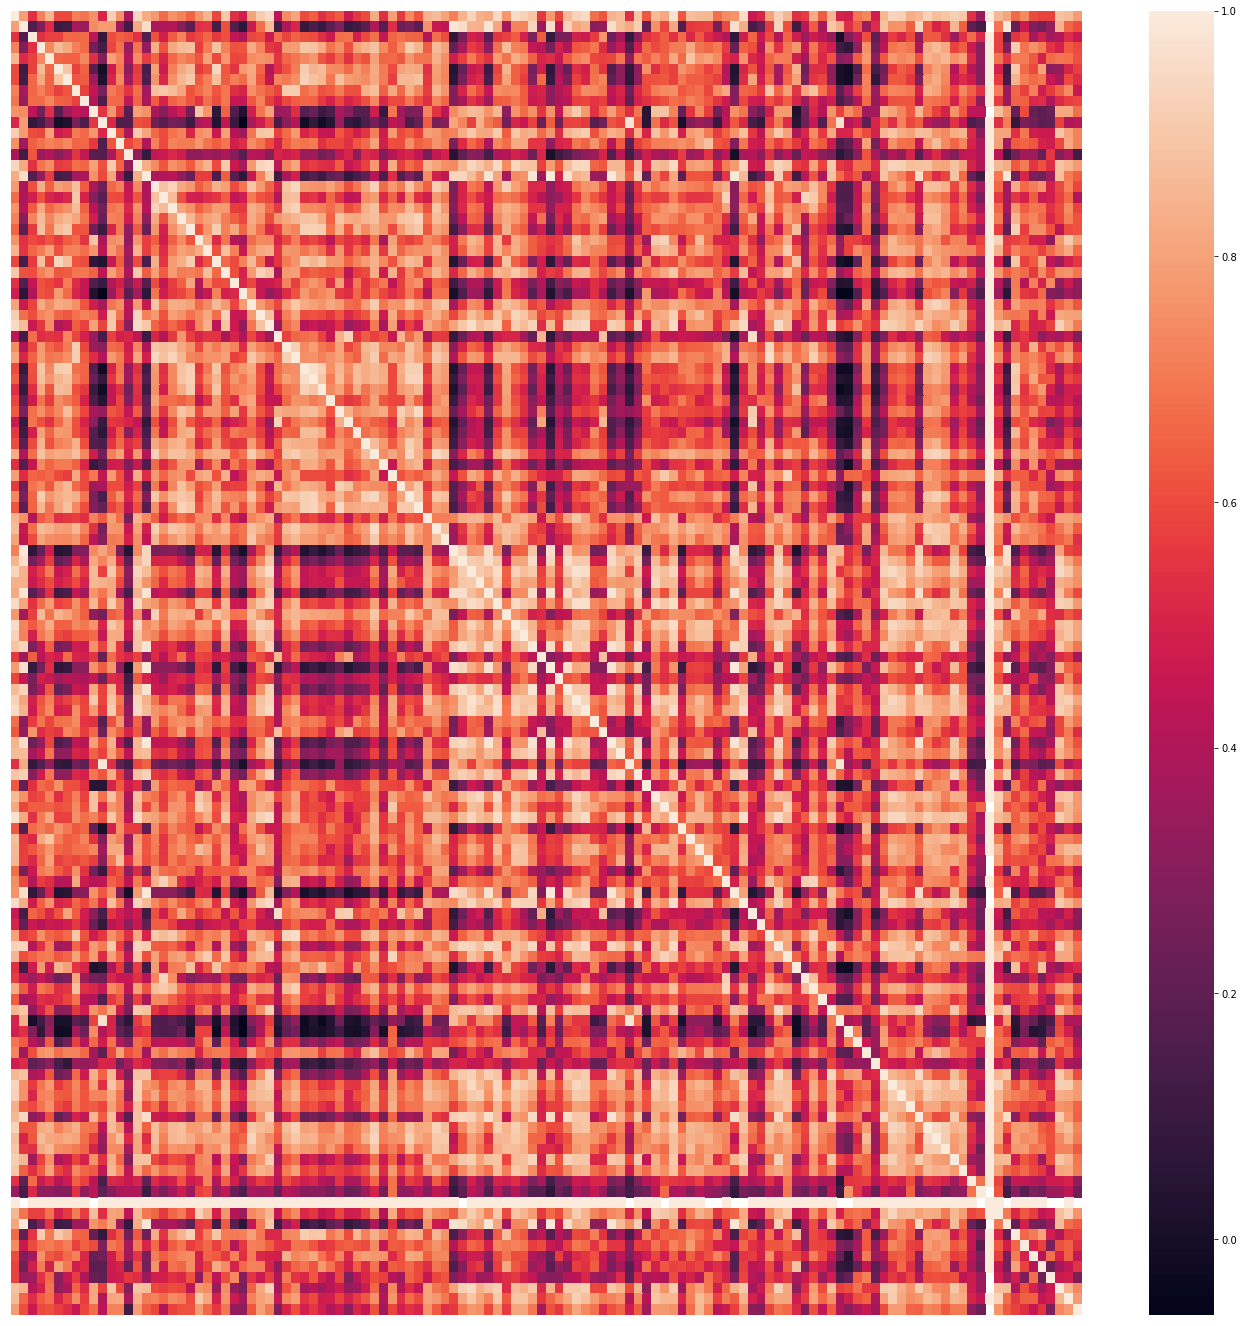

In [17]:
plt.figure(figsize=(24,24))
sns.heatmap(impcors,xticklabels=False, yticklabels=False)